In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
iris = pd.read_csv('../data/iris.csv')

In [13]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [14]:
setosa = iris[iris['variety'] == 'Setosa']
versicolor = iris[iris['variety'] == 'Versicolor']
virginica = iris[iris['variety'] == 'Virginica']

seed=105

train_set = pd.concat([setosa.sample(n=35, random_state=seed),
                       versicolor.sample(n=35, random_state=seed),
                       virginica.sample(n=35, random_state=seed)])
test_set = iris.drop(index=train_set.index)

In [15]:
test_set.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
6,4.6,3.4,1.4,0.3,Setosa
9,4.9,3.1,1.5,0.1,Setosa
15,5.7,4.4,1.5,0.4,Setosa


In [16]:
# train_set.reset_index(inplace=True)
# test_set.reset_index(inplace=True)

In [17]:
def knn(vector, dataset, k):
    distance = sum([(dataset[category] - vector[category]) ** 2 for category in vector.index[:-1]])
    distance.index = dataset.variety
    return distance.nsmallest(k).index.to_series().mode()[0]

In [18]:
scores = []

for k in range(1, len(test_set)):
    predicted = test_set.apply(lambda x: knn(x, train_set, k), axis=1)
    scores.append(sum(test_set.variety == predicted) / len(test_set) * 100)

scores = pd.Series(scores, index=range(1, len(test_set)))
scores

1     93.333333
2     93.333333
3     93.333333
4     93.333333
5     95.555556
6     97.777778
7     97.777778
8     97.777778
9     97.777778
10    97.777778
11    97.777778
12    97.777778
13    97.777778
14    95.555556
15    97.777778
16    97.777778
17    97.777778
18    97.777778
19    97.777778
20    95.555556
21    97.777778
22    95.555556
23    95.555556
24    95.555556
25    93.333333
26    95.555556
27    95.555556
28    95.555556
29    95.555556
30    95.555556
31    95.555556
32    95.555556
33    95.555556
34    95.555556
35    95.555556
36    95.555556
37    95.555556
38    95.555556
39    93.333333
40    91.111111
41    93.333333
42    91.111111
43    91.111111
44    88.888889
dtype: float64

In [19]:
predictions = test_set.apply(lambda x: knn(x, train_set, 3), axis=1)
test_set_preds = pd.concat([test_set, predictions], axis=1)
test_set_preds.rename(columns={0: 'predictions'}, inplace='True')
test_set_preds

,sepal.length,sepal.width,petal.length,petal.width,variety,predictions
0,5.1,3.5,1.4,0.2,Setosa,Setosa
1,4.9,3.0,1.4,0.2,Setosa,Setosa
6,4.6,3.4,1.4,0.3,Setosa,Setosa
9,4.9,3.1,1.5,0.1,Setosa,Setosa
15,5.7,4.4,1.5,0.4,Setosa,Setosa
19,5.1,3.8,1.5,0.3,Setosa,Setosa
22,4.6,3.6,1.0,0.2,Setosa,Setosa
29,4.7,3.2,1.6,0.2,Setosa,Setosa
30,4.8,3.1,1.6,0.2,Setosa,Setosa
32,5.2,4.1,1.5,0.1,Setosa,Setosa


In [20]:
colors = {
    'Setosa': 'blue',
    'Versicolor': 'orange',
    'Virginica': 'green'
}


# test_set_preds.predictions.map(lambda x: colors[x])
# test_set_preds.variety == test_set_preds.predictions
# true_preds.apply(lambda x: 'o' if x else 'x')
# test_set_preds[~true_preds]

NameError: name 'true_preds' is not defined

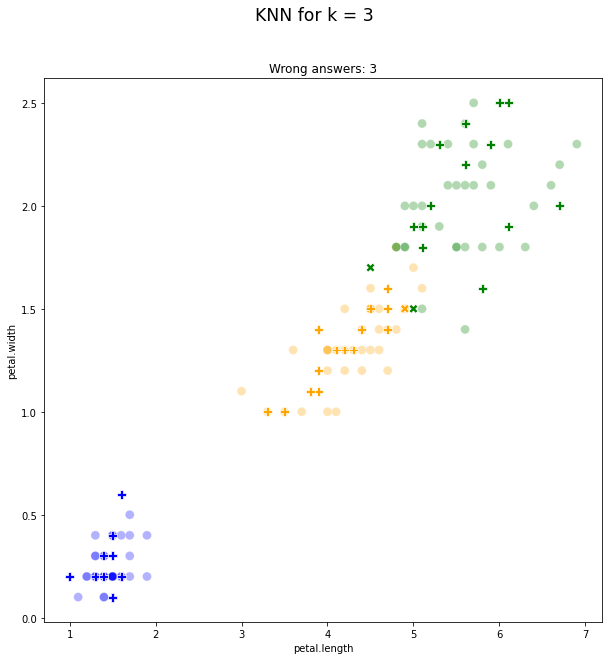

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

colors = {
    'Setosa': 'blue',
    'Versicolor': 'orange',
    'Virginica': 'green'
}

true_preds = test_set_preds.variety == test_set_preds.predictions
markers = true_preds.apply(lambda x: 'o' if x else 'x')

test_set_edges = ['red' for i in range(len(test_set_preds[~true_preds]))]#test_set_preds[~true_preds].predictions.map(lambda x: colors[x])
colors1 = train_set.variety.map(lambda x: colors[x])
colors2 = test_set_preds[true_preds].variety.map(lambda x: colors[x])
colors3 = test_set_preds[~true_preds].variety.map(lambda x: colors[x])

sns.scatterplot(data=train_set, x='petal.length', y='petal.width', c=colors1, ax=ax, s=80, alpha=.3)
sns.scatterplot(data=test_set_preds[true_preds], x='petal.length', y='petal.width', c=colors2, ax=ax, s=80, marker="P")
sns.scatterplot(data=test_set_preds[~true_preds], x='petal.length', y='petal.width', c=colors3, ax=ax, s=80, marker="X")


plt.suptitle("KNN for k = 3", size='xx-large')
plt.title(f"Wrong answers: {len(colors3)}")
# plt.show()
plt.savefig('fig.jpg')

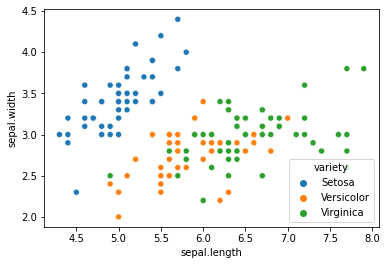

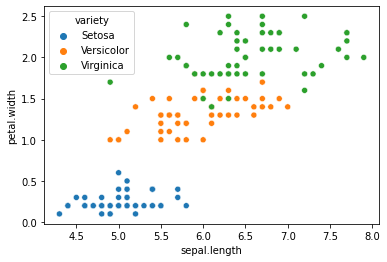

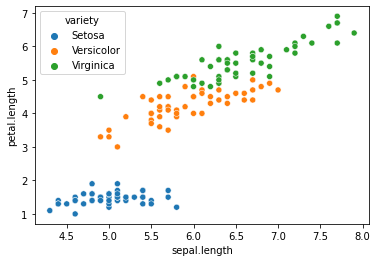

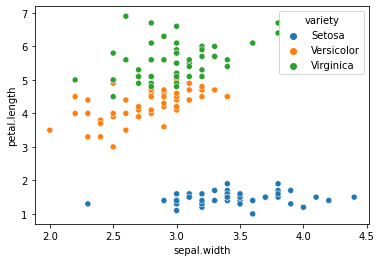

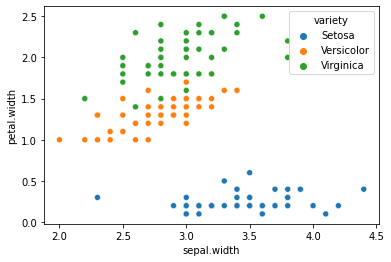

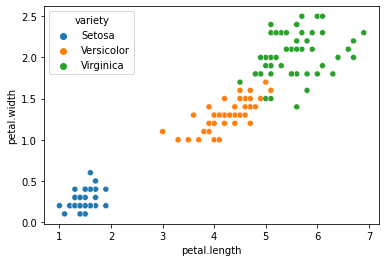

In [32]:
sns.scatterplot(x='sepal.length', y='sepal.width', hue='variety', data=iris)
plt.show()
sns.scatterplot(x='sepal.length', y='petal.width', hue='variety', data=iris)
plt.show()
sns.scatterplot(x='sepal.length', y='petal.length', hue='variety', data=iris)
plt.show()
sns.scatterplot(x='sepal.width', y='petal.length', hue='variety', data=iris)
plt.show()
sns.scatterplot(x='sepal.width', y='petal.width', hue='variety', data=iris)
plt.show()
sns.scatterplot(x='petal.length', y='petal.width', hue='variety', data=iris)
plt.show()

In [39]:
sns.pairplot(iris.loc[:, 'sepal.length':'petal.width'], hue=iris['variety'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().